## 1.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop('math score',axis=1)

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y=df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [8]:
print(f"Categories in 'Gender' variable:{df['gender'].unique()} & count:{len(df['gender'].unique())}")
print(f"Categories in 'Race' variable:{df['race/ethnicity'].unique()} & count:{len(df['race/ethnicity'].unique())}")
print(f"Categories in 'parental level of education' variable:{df['parental level of education'].unique()} & count:{len(df['parental level of education'].unique())}")
print(f"Categories in 'lunch' variable:{df['lunch'].unique()} & count:{len(df['lunch'].unique())}")
print(f"Categories in 'test preparation course' variable:{df['test preparation course'].unique()} & count:{len(df['test preparation course'].unique())}")

Categories in 'Gender' variable:['female' 'male'] & count:2
Categories in 'Race' variable:['group B' 'group C' 'group A' 'group D' 'group E'] & count:5
Categories in 'parental level of education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] & count:6
Categories in 'lunch' variable:['standard' 'free/reduced'] & count:2
Categories in 'test preparation course' variable:['none' 'completed'] & count:2


In [9]:
# creating column  transformer
numerical_col = X.select_dtypes(exclude='O').columns
categorical_col = X.select_dtypes(include='O').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transf = StandardScaler()
cat_transf = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",cat_transf,categorical_col),
        ("StandardScalar",num_transf,numerical_col)
    ])


X = preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Evaluation metrics for all the models 

In [12]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Model development

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Ridge": Ridge(),
    "Random Forest Regressor": RandomForestRegressor(),
    "KNN Regressor": KNeighborsRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVM Regressor": SVR()
}

models_list = []
r2_list = []

def Fit (model):
    for i in range(len(list(models))):
        # fitting each model
        model = list(models.values())[i]
        model.fit(X_train, y_train)

        # making predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)


        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("- R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("- R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)

        print('='*35)
        print('\n')

In [14]:
Fit(models)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.0793
- Mean Absolute Error: 6.3750
- R2 Score: 0.7318


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
-------------------------------

### Results

In [15]:
Result = pd.DataFrame(list(zip(models_list,r2_list)),columns = ['Model Name', "R2_Score"]).sort_values(by=['R2_Score'], 
                                                                                ascending= False)
Result

,Model Name,R2_Score
3,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoost Regressor,0.851632
4,Random Forest Regressor,0.850025
8,AdaBoost Regressor,0.849868
1,Lasso,0.825320
6,XGB Regressor,0.821589
5,KNN Regressor,0.783193
2,Decision Tree,0.731752
9,SVM Regressor,0.728600


#### Linear Regression

In [17]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


#### Plot y_pred and y_test

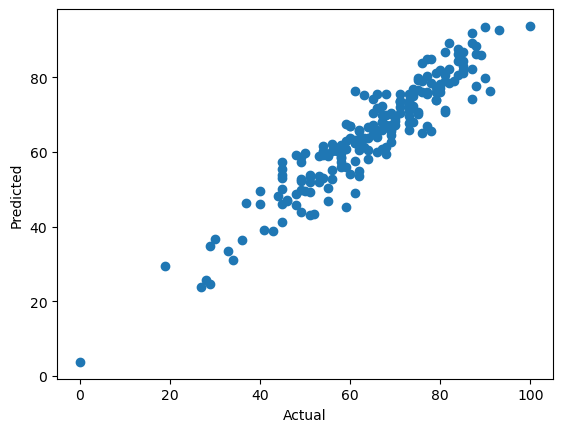

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<AxesSubplot:xlabel='math score'>

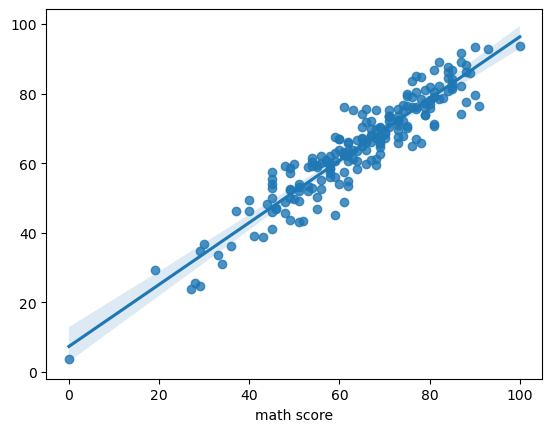

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=100)

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
